In [119]:
import praw
import pandas as pd

In [120]:
CLIENT_ID = "jPszoCPfw5oYGg"
CLIENT_SECRET = "J3w-3cWDzVzAz2DwlRQsqpsWiYE"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/chrisjeogmaster)"

In [121]:
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [122]:
api.read_only

True

In [123]:
submissions = api.subreddit("askreddit").hot(limit = 10)

In [124]:
new_list = []
for submission in submissions:
    new_list.append({
        "title" : submission.title,
        "score" : submission.score,
        "comments" : submission.num_comments
    })

In [125]:
print(new_list)

[{'title': 'What was the cringiest thing you did in your first relationship?', 'score': 28604, 'comments': 11322}, {'title': 'What’s the dumbest thing you’ve heard someone say that made you wonder how they function on a day to day basis?', 'score': 52443, 'comments': 29799}, {'title': 'What is something that HAS aged well?', 'score': 5737, 'comments': 6554}, {'title': 'What is something that MOST adults can do, but you, for whatever reason, cannot pull off?', 'score': 361, 'comments': 690}, {'title': 'What have we all conveniently forgotten about?', 'score': 5498, 'comments': 5170}, {'title': 'What made you laugh the hardest in your entire life?', 'score': 8233, 'comments': 3969}, {'title': 'What is the worst thing to cheap out on?', 'score': 649, 'comments': 921}, {'title': "What is the most physically painful thing you've ever gone through?", 'score': 374, 'comments': 820}, {'title': "Men of reddit, what do women do that they think is sexy, but actually isn't?", 'score': 776, 'commen

In [126]:
df = pd.DataFrame(new_list)
df.head(5)

,comments,score,title
0,11322,28604,What was the cringiest thing you did in your f...
1,29799,52443,What’s the dumbest thing you’ve heard someone ...
2,6554,5737,What is something that HAS aged well?
3,690,361,"What is something that MOST adults can do, but..."
4,5170,5498,What have we all conveniently forgotten about?


In [127]:
df.to_json("api_exerciseChrisje.json")

In [128]:
df = pd.read_json("api_exerciseChrisje.json")

In [129]:
df.head(5)

,comments,score,title
0,11322,28604,What was the cringiest thing you did in your f...
1,29799,52443,What’s the dumbest thing you’ve heard someone ...
2,6554,5737,What is something that HAS aged well?
3,690,361,"What is something that MOST adults can do, but..."
4,5170,5498,What have we all conveniently forgotten about?


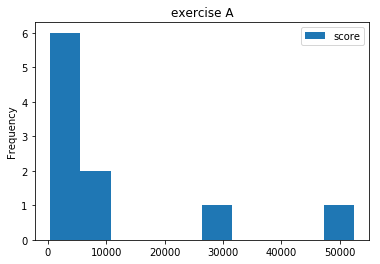

In [130]:
df.plot(kind = "hist", y = "score", bins = 10, title = "exercise A")

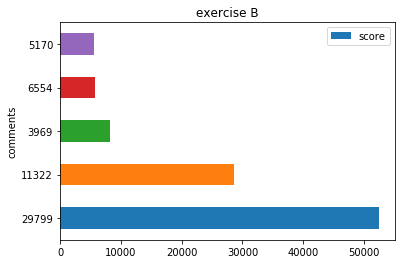

In [131]:
high = df.sort_values("score", ascending = False) #volgorde omkeren
high[0:5].plot(y = "score", x = "comments", kind = "barh", title = "exercise B")
highest = df["score"].max()

In [132]:
print(highest.max())

52443


In [133]:
allscores = df.score.sum()

In [134]:
newlist = [allscores, highest]
newdf = pd.DataFrame(newlist)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122625748>],
      dtype=object)

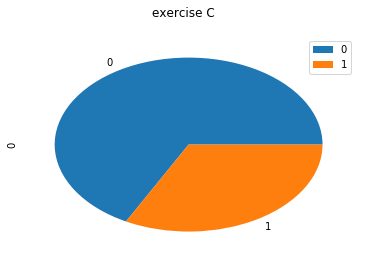

In [135]:
newdf.plot.pie(subplots=True, title = "exercise C")

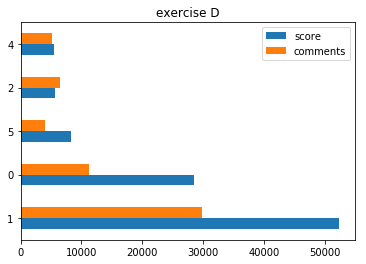

In [136]:
high[0:5].plot(y = ["score", "comments"], kind = "barh", title = "exercise D")

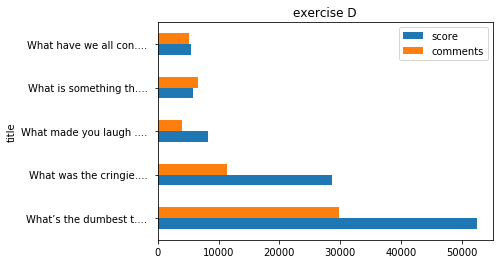

In [142]:
high['title'] = high['title'].apply(lambda x: x[0:20]) +".... "
high[0:5].plot(y = ["score", "comments"], x = "title", kind = "barh", title = "exercise D")